<a href="https://colab.research.google.com/github/JChengecha/Vehicle_Insurance_cross_sell_prediction/blob/main/Secondary_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***INSURANCE PREDICTION PROJECT***

# ***Defining the Question***

## ***a) Specifying the data analytic question***

> We are required to build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.The model will be based on the building characteristics. 

## ***b) Defining the Metric for Success***

> To be able to build a tensor flow model.

## ***c) Understanding the Context***

Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

We had been appointed as the Lead Data Analysts to build a predictive model to determine if a building will have an insurance claim during a certain period or not. We had to predict the probability of having at least one claim over the insured period of the building.

The model will be based on the building characteristics. The target variable, Claim, is a:

- 1 if the building has at least a claim over the insured period.
- 0 if the building doesn’t have a claim over the insured period.

## ***d) Recording the Experimental Design***

> - Import the relevant libraries that we will use in our analysis
- Read and explore the dataset we will use for our project
- Define the appropriateness of the available data with regards to the project
- Find and deal with outliers, anomalies, and missing data within the dataset.
- Perform univariate and bivariate analysis while recording our observations.
- Implement the solution by using tensor flow.
- Challenge the solution by giving insights on how we can optimize the models to give us a better performance as compared to the baseline model.
- Provide recommendations based on the whole analysis and modelling techniques used in the project.

## ***e) Data Relevance***

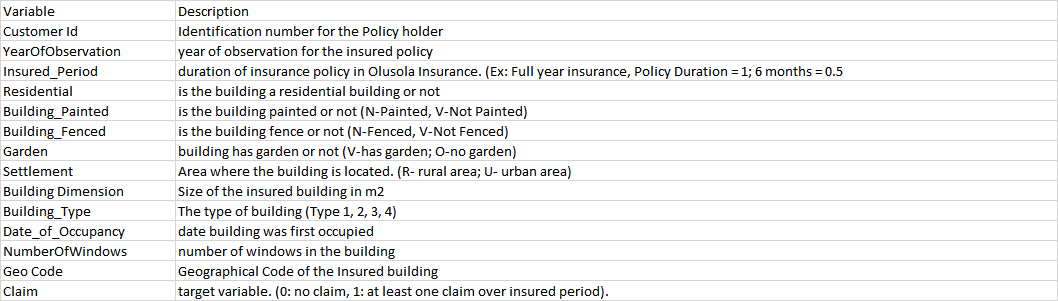

#***Importing the required libraries***

In [ ]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#***Loading Data***

In [ ]:
#Loadning our dataset
df = pd.read_csv("/content/silvia cleaned dataset")

In [ ]:
#Previewing the top 5 entries
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
#Previewing the bottom five entries
df.tail()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,2012,1.000000,1,V,V,V,U,400.0,1,2001.0,.,6088,0
7156,2013,1.000000,0,V,V,V,U,400.0,2,1980.0,.,6088,1
7157,2016,0.038251,0,V,V,V,U,400.0,1,1992.0,.,6088,0
7158,2013,1.000000,0,V,V,V,U,400.0,1,1972.0,.,6088,0
7159,2014,1.000000,0,V,V,V,U,400.0,1,2004.0,.,6088,0


In [ ]:
#Viewing the data types of our variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7160 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building Dimension  7160 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   7160 non-null   float64
 10  NumberOfWindows     7160 non-null   object 
 11  Geo_Code            7160 non-null   object 
 12  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 727.3+ KB


#***Data Cleaning***

In [ ]:
#Changing our column names to lowercase
df.columns = df.columns.str.lower()

In [ ]:
#Checking if there were null values in our dataset
df.isnull().sum()

yearofobservation     0
insured_period        0
residential           0
building_painted      0
building_fenced       0
garden                0
settlement            0
building dimension    0
building_type         0
date_of_occupancy     0
numberofwindows       0
geo_code              0
claim                 0
dtype: int64

In [ ]:
#Checking for double entry
df.duplicated().sum()

14

In [ ]:
#Dropping duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
# change the classes in the various columns

df['building_painted'] = df['building_painted'].replace({'V':'not painted','N':'painted'})

df['settlement'] = df['settlement'].replace({'R':'rural','U':'urban'})

df['building_fenced'] = df['building_fenced'].replace({'N':'fenced','V':'not fenced'})

df['garden'] = df['garden'].replace({'V':'has garden','O':'no garden'})



df.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building dimension,building_type,date_of_occupancy,numberofwindows,geo_code,claim
0,2013,1.0,0,painted,not fenced,has garden,urban,290.0,1,1960.0,.,1053,0
1,2015,1.0,0,not painted,fenced,no garden,rural,490.0,1,1850.0,4,1053,0
2,2014,1.0,0,painted,not fenced,has garden,urban,595.0,1,1960.0,.,1053,0
3,2013,1.0,0,not painted,not fenced,has garden,urban,2840.0,1,1960.0,.,1053,0
4,2014,1.0,0,not painted,fenced,no garden,rural,680.0,1,1800.0,3,1053,0


In [ ]:
#filling the null vlaues within the number of windows column
df.numberofwindows = df.numberofwindows.replace('.',np.nan)
df['numberofwindows'] = df['numberofwindows'].fillna(df['numberofwindows'].mode())
#confirming that they '.' have been filled
(df.numberofwindows=='.').sum()

0

### Outliers

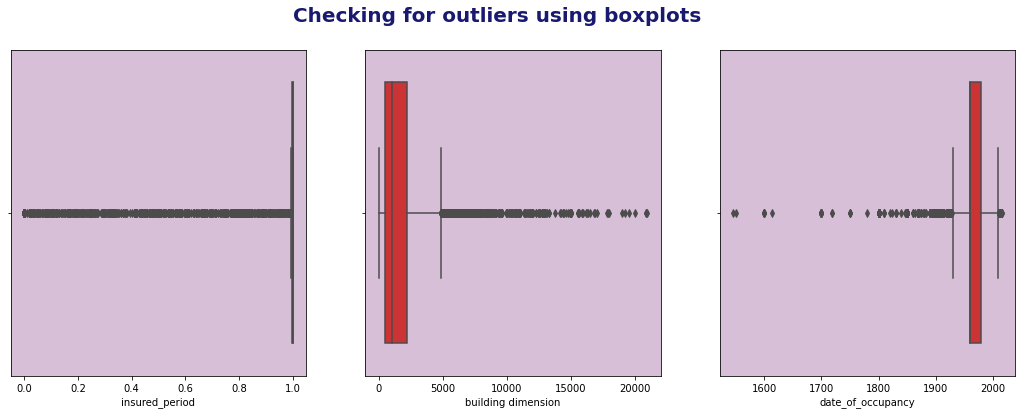

In [ ]:
#Checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

numerical_cols = df[['insured_period', 'building dimension','date_of_occupancy']]
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
plt.suptitle('Checking for outliers using boxplots',fontsize=20,weight='bold',color='midnightblue')
for ax, data, column in zip(axes.flatten(),df,numerical_cols):
  sns.boxplot(df[column],ax=ax,palette='Set1')
  ax.set_facecolor('thistle')


# ***Exploratory Data Analysis***

### ***Univariate Analysis***

####***Categorical Variables***

Text(0.5, 1.0, 'Count plot of Claim')

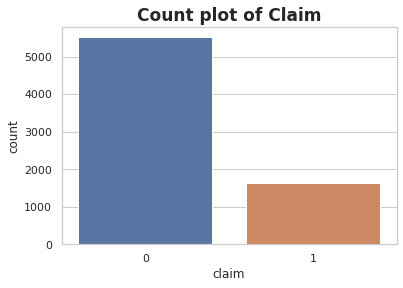

In [ ]:
sns.set_theme(style='whitegrid')
sns.countplot(x='claim',data=df)
plt.title('Count plot of Claim',fontsize=17,fontweight='bold')

Text(0.5, 1.0, 'Count plot of Buliding painted')

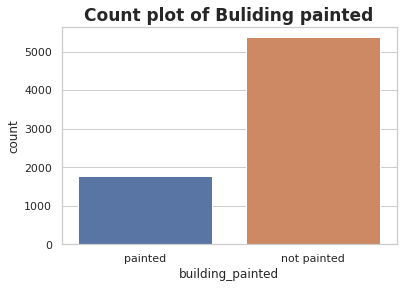

In [ ]:
sns.set_theme(style='whitegrid')
sns.countplot(x='building_painted',data=df)
plt.title('Count plot of Buliding painted',fontsize=17,fontweight='bold')

> We can see that most of the buildings were not painted

Text(0.5, 1.0, 'Count plot of settlement')

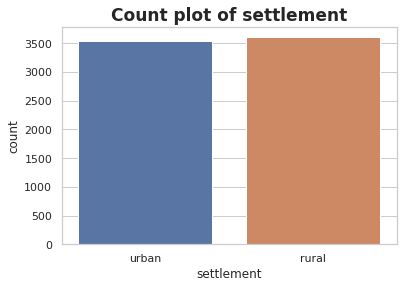

In [ ]:

sns.set_theme(style='whitegrid')
sns.countplot(x='settlement',data=df)
plt.title('Count plot of settlement',fontsize=17,fontweight='bold')

> Most of the buildings were located in rural areas

Text(0.5, 1.0, 'Count plot of Number of windows')

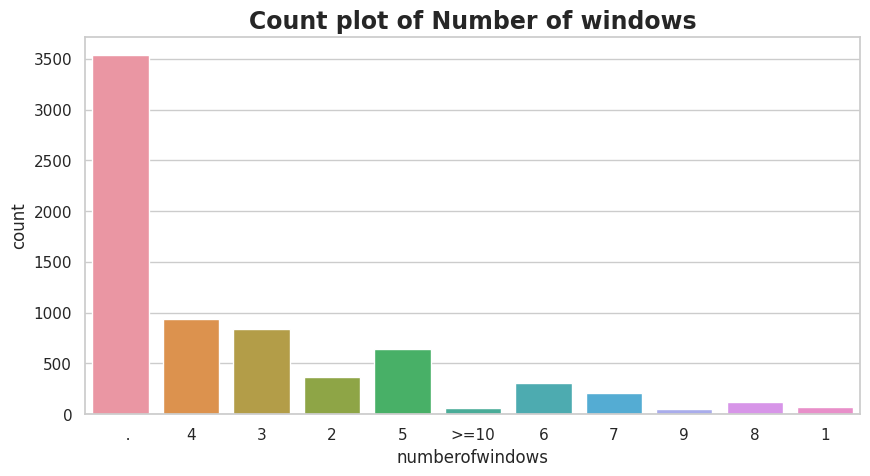

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.set_theme(style='whitegrid')
sns.countplot(x='numberofwindows',data=df)
plt.title('Count plot of Number of windows',fontsize=17,fontweight='bold')

> We can see that the bulding with 4 windows were the most popular

> ***Pie Charts***

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


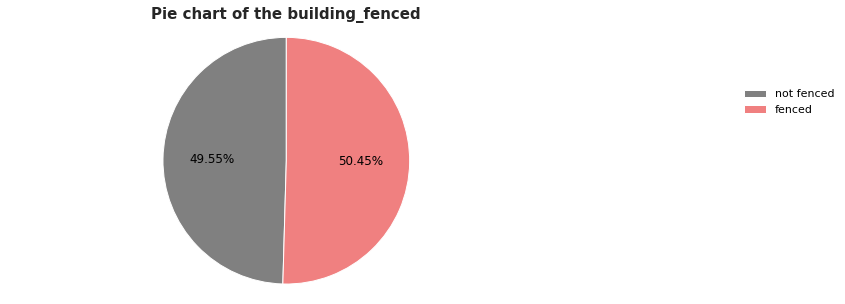

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

group = df['building_fenced'].value_counts(sort=False).reset_index(name= "counts")
color_palette_list = ['gray','lightcoral','lightskyblue']
#plt.figure(figsize=(20,5))
ax.pie(group['counts'],  
       colors=color_palette_list[0:3], autopct='%1.2f%%', 
       shadow=False, startangle=90)
ax.axis('equal')
ax.set_title("Pie chart of the building_fenced",fontweight='bold',fontsize=15)
ax.legend(labels=group['index'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

> The number of painted buildings were most with a 50.45% as compared to those not painted which had a 49.55%

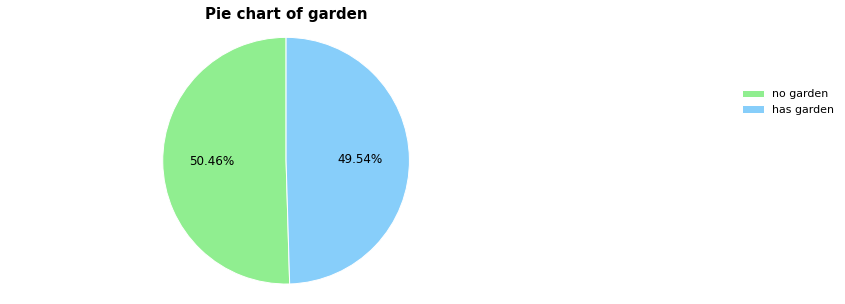

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

group = df['garden'].value_counts(sort=False).reset_index(name= "counts")
color_palette_list = ['lightgreen','lightskyblue']
#plt.figure(figsize=(20,5))
ax.pie(group['counts'],  
       colors=color_palette_list[0:3], autopct='%1.2f%%', 
       shadow=False, startangle=90)
ax.axis('equal')
ax.set_title("Pie chart of garden",fontweight='bold',fontsize=15)
ax.legend(labels=group['index'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

> The number of buildings without a garden were the most with a percentage of 50.46% as compared to those with a garden who had 49.54%

#### ***Numerical Variables***

***##Measures of central tendancy***

In [ ]:
#mean
df.mean().sort_values(ascending=False)

yearofobservation     2013.671425
date_of_occupancy     1964.119367
building dimension    1862.279877
building_type            2.186258
insured_period           0.909648
residential              0.305206
claim                    0.228380
dtype: float64

> - The year of observation recorded a mean of 2013.671425
- The mean date of occupancy was 1964.119367
- The mean building dimension is 1862.279877
- The mean of building type is 2.186258
- The mean of the insured period is 0.305206
- The mean for claim is 0.228380

In [ ]:
#mode

d1 = df['yearofobservation'].mode()
print("The mode for yearofobservation is: \n", d1)
print('\n')
d2 = df['date_of_occupancy'].mode()
print("The mode for date_of_occupancy is: \n", d2)
print('\n')
d3 = df['building dimension'].mode()
print("The mode for building dimension is: \n", d3)
print('\n')
d4 = df['building_type'].mode()
print("The mode for building_type is: \n", d4)
print('\n')
d4 = df['insured_period'].mode()
print("The mode for insured_period is: \n", d4)
print('\n')
d4 = df['residential'].mode()
print("The mode for residential is: \n", d4)
print('\n')
d4 = df['claim'].mode()
print("The mode for claim is: \n", d4)
print('\n')

The mode for yearofobservation is: 
 0    2012
dtype: int64


The mode for date_of_occupancy is: 
 0    1960.0
dtype: float64


The mode for building dimension is: 
 0    400.0
dtype: float64


The mode for building_type is: 
 0    2
dtype: int64


The mode for insured_period is: 
 0    1.0
dtype: float64


The mode for residential is: 
 0    0
dtype: int64


The mode for claim is: 
 0    0
dtype: int64




In [ ]:
#median for numeric variables
d1 = df.median().sort_values(ascending=False)
d1

yearofobservation     2013.0
date_of_occupancy     1960.0
building dimension    1050.0
building_type            2.0
insured_period           1.0
claim                    0.0
residential              0.0
dtype: float64

***##Measures of dispersion***

In [ ]:
#Standard deviation for numeric variables
d1 = df.std().sort_values(ascending=False)
d1

building dimension    2268.982351
date_of_occupancy       34.743155
yearofobservation        1.383827
building_type            0.941024
residential              0.460527
claim                    0.419818
insured_period           0.239916
dtype: float64

In [ ]:
#Variance for numeric variables
d1 = df.var().sort_values(ascending=False)
d1

building dimension    5.148281e+06
date_of_occupancy     1.207087e+03
yearofobservation     1.914976e+00
building_type         8.855270e-01
residential           2.120849e-01
claim                 1.762470e-01
insured_period        5.755967e-02
dtype: float64

In [ ]:
#The quantiles
d = df['building dimension'].quantile([0.25,0.5,0.75])
print('The quantiles for building dimension is \n', d)
print('\n')
d3 = df['date_of_occupancy'].quantile([0.25,0.5,0.75])
print('The quantiles for date_of_occupancy is \n', d3)
print('\n')
d1 = df['yearofobservation'].quantile([0.25,0.5,0.75])
print('The quantiles for yearofobservation is \n', d1)
print('\n')
d2 = df['building_type'].quantile([0.25,0.5,0.75])
print('The quantiles for building_type is \n', d2)
print('\n')
d = df[ 'residential'].quantile([0.25,0.5,0.75])
print('The quantiles for residential is \n', d)
print('\n')
d3 = df['claim'].quantile([0.25,0.5,0.75])
print('The quantiles for claim is \n', d3)
print('\n')
d1 = df['insured_period'].quantile([0.25,0.5,0.75])
print('The quantiles for insured_period  is \n', d1)
print('\n')

The quantiles for building dimension is 
 0.25     500.0
0.50    1050.0
0.75    2250.0
Name: building dimension, dtype: float64


The quantiles for date_of_occupancy is 
 0.25    1960.0
0.50    1960.0
0.75    1980.0
Name: date_of_occupancy, dtype: float64


The quantiles for yearofobservation is 
 0.25    2012.0
0.50    2013.0
0.75    2015.0
Name: yearofobservation, dtype: float64


The quantiles for building_type is 
 0.25    2.0
0.50    2.0
0.75    3.0
Name: building_type, dtype: float64


The quantiles for residential is 
 0.25    0.0
0.50    0.0
0.75    1.0
Name: residential, dtype: float64


The quantiles for claim is 
 0.25    0.0
0.50    0.0
0.75    0.0
Name: claim, dtype: float64


The quantiles for insured_period  is 
 0.25    0.997268
0.50    1.000000
0.75    1.000000
Name: insured_period, dtype: float64




***##Skeweness and kurtosis***

In [ ]:
# Skewness
print("Skewness")
skew = df.skew().reset_index(name="Skew_value")
skew.rename(columns={"index":"numerical_variables"},inplace=True)
skew.loc[skew['Skew_value'] == 0,'Status'] = "Symmetric"
skew.loc[skew['Skew_value'] > 0,'Status'] = "Positively skewed"
skew.loc[skew['Skew_value'] < 0,'Status'] = "Negatively skewed"
skew

Skewness


,numerical_variables,Skew_value,Status
0,yearofobservation,0.346068,Positively skewed
1,insured_period,-2.747243,Negatively skewed
2,residential,0.846200,Positively skewed
3,building dimension,3.142803,Positively skewed
4,building_type,0.537174,Positively skewed
5,date_of_occupancy,-3.248335,Negatively skewed
6,claim,1.294355,Positively skewed


In [ ]:
# Kurtosis
print("Kurtosis")
kurtosis = df.kurt().reset_index(name='Kurtosis_value')
kurtosis.rename(columns={"index":"numerical_variables"},inplace=True)
kurtosis.loc[kurtosis['Kurtosis_value'] == 0,'Status'] = "Mesokurtic"
kurtosis.loc[kurtosis['Kurtosis_value'] > 0,'Status'] = "Leptokurtic"
kurtosis.loc[kurtosis['Kurtosis_value'] < 0,'Status'] = "Platykurtic"
kurtosis

Kurtosis


,numerical_variables,Kurtosis_value,Status
0,yearofobservation,-1.135952,Platykurtic
1,insured_period,6.357418,Leptokurtic
2,residential,-1.284305,Platykurtic
3,building dimension,13.631522,Leptokurtic
4,building_type,-0.542710,Platykurtic
5,date_of_occupancy,23.042605,Leptokurtic
6,claim,-0.324737,Platykurtic


In [ ]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearofobservation,7146.0,2013.671425,1.383827,2012.0,2012.000000,2013.0,2015.0,2016.0
insured_period,7146.0,0.909648,0.239916,0.0,0.997268,1.0,1.0,1.0
residential,7146.0,0.305206,0.460527,0.0,0.000000,0.0,1.0,1.0
building dimension,7146.0,1862.279877,2268.982351,1.0,500.000000,1050.0,2250.0,20940.0
building_type,7146.0,2.186258,0.941024,1.0,2.000000,2.0,3.0,4.0
date_of_occupancy,7146.0,1964.119367,34.743155,1545.0,1960.000000,1960.0,1980.0,2016.0
claim,7146.0,0.228380,0.419818,0.0,0.000000,0.0,0.0,1.0


###***Bivariate Analysis***

 ## **Count plots**

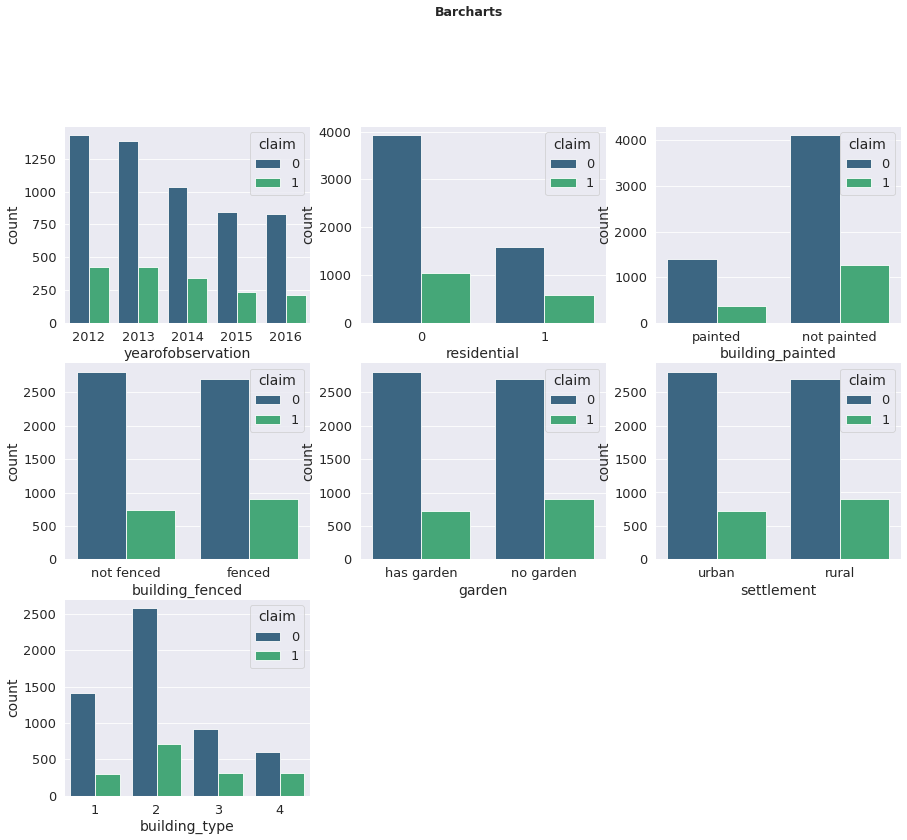

In [ ]:
#plotting bar charts
sns.set(font_scale=1.4)

ax=plt.figure(figsize=(18,20),dpi=60)

plt.subplot(431)
sns.countplot(x='yearofobservation', data=df, hue='claim',palette='viridis')

plt.subplot(432)
sns.countplot(x='residential', data=df, hue='claim',palette='viridis')
plt.subplot(433)
sns.countplot(x='building_painted', data=df, hue='claim',palette='viridis')
plt.subplot(434)
sns.countplot(x='building_fenced', data=df, hue='claim',palette='viridis')
plt.subplot(435)
sns.countplot(x='garden', data=df, hue='claim',palette='viridis')
plt.subplot(436)
sns.countplot(x='settlement', data=df, hue='claim',palette='viridis')
plt.subplot(437)
sns.countplot(x='building_type', data=df, hue='claim',palette='viridis')


ax.suptitle('Barcharts',fontweight='bold',fontsize=15)
plt.show()

Insights:
* As of 2014 to 2016, the number of buildings that had claims  reduced significantly
* Non residential buildings had more claims as compared to residential buildings
* Not painted buildings had more claims compared to painted buildings
* Fenced had more claims compared to not fenced
* Buildings with gardens have more claims compared to without gardens
*  Rural settlements have more claims compared to urban settlements.
* Building type 2 has the most claims in comparison to other types.


 ## **Histograms**

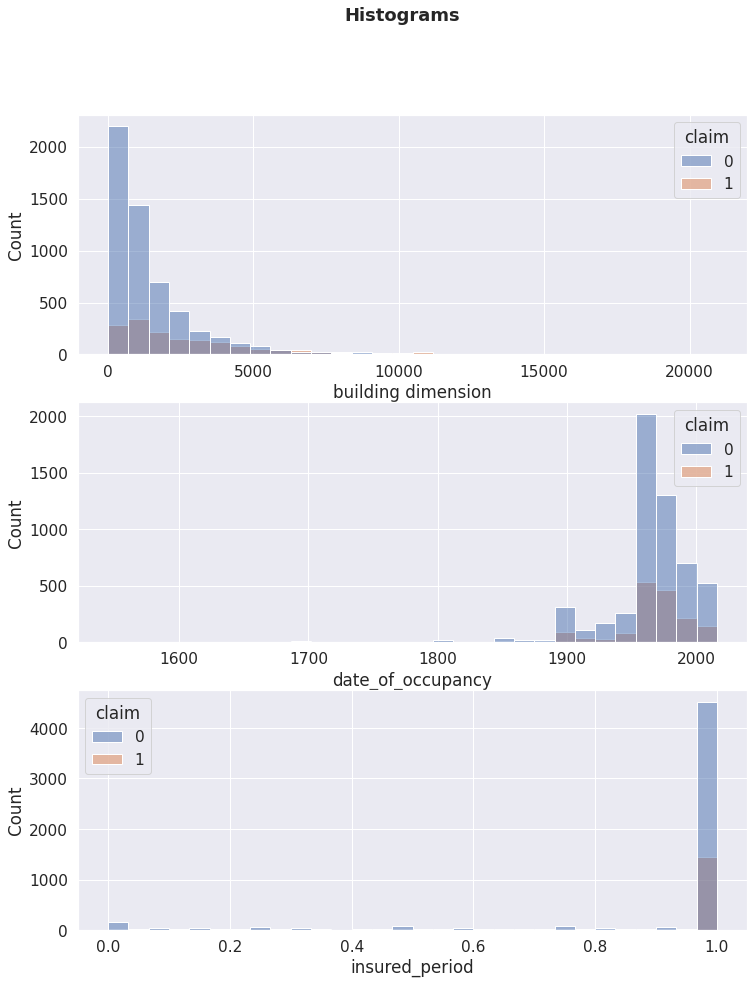

In [ ]:
# Histograms of the categorical and numerical variables
sns.set(font_scale=1.4)
ax = plt.figure(figsize=(12,15))

plt.subplot(311)
sns.histplot(data=df, x= 'building dimension', hue= 'claim', bins=30)

plt.subplot(312)
sns.histplot(data=df, x= 'date_of_occupancy', hue= 'claim', bins=30)

plt.subplot(313)
sns.histplot(data=df, x= 'insured_period', hue= 'claim', bins=30)


ax.suptitle('Histograms',fontweight='bold',fontsize=18)
plt.show()

* Building dimensions skewed to the right
* Date of occupancy skewed to the left

##**Correlation**

> ### **Pairplot**

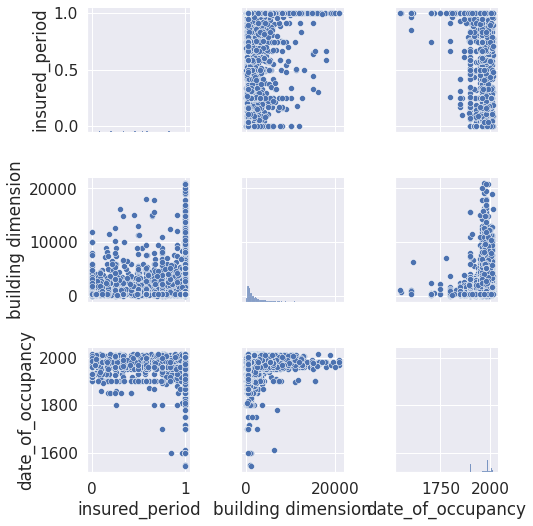

In [ ]:
sns.pairplot(df[['insured_period','building dimension','date_of_occupancy']])

> 

> ## **Using heatmap to check for Correlation**

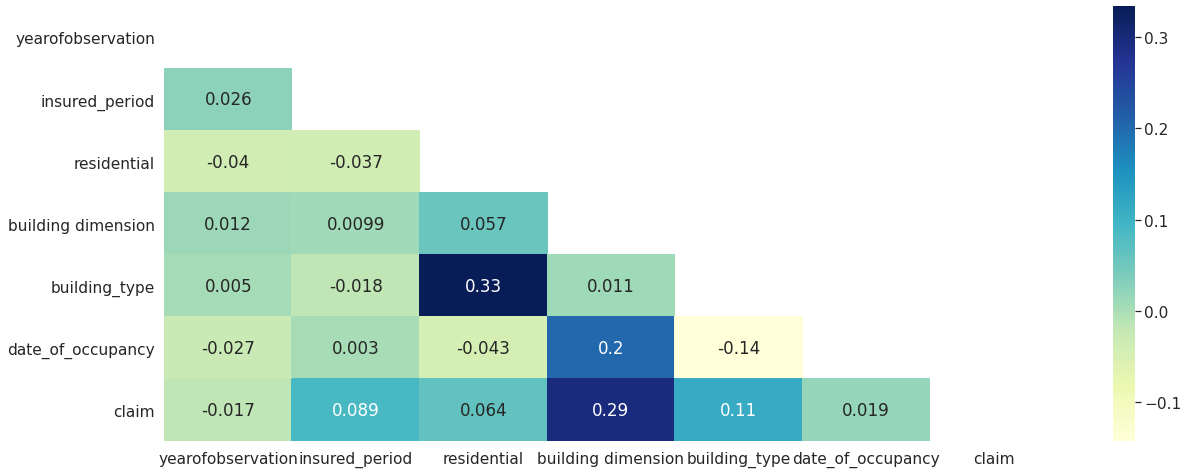

In [ ]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,8))
    ax = sns.heatmap(df.corr(),
mask=mask,annot=True,cmap="YlGnBu")

> From the pair plot and the heatmap we can see that weak correlation between the variables

##**Multivariate Analysis**

In [ ]:
df.columns

Index(['yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code', 'claim'],
      dtype='object')

In [ ]:
# Separating our target label (type) from the other features
X = df.drop(['claim'],axis=1)
y = df['claim']
# Subject our features to LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
                                  
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)                                 

,0
building_fenced,4.175988
garden,4.016803
insured_period,0.996478
settlement,0.486379
building_type,0.257335
numberofwindows,0.144999
residential,0.060102
building dimension,0.000323
geo_code,0.000063
date_of_occupancy,-0.001661


* From LDA we can deduce:
Building fenced, garden, insured period,settlement,building type and numberofwindows hold more weight in explaining the claim variable
 

#***Implementing the Solution***

Encoding categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ('building_painted', 'building_fenced', 'garden', 'settlement','geo_code','numberofwindows')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

Random under-sampling:
1    1632
0    1632
Name: claim, dtype: int64


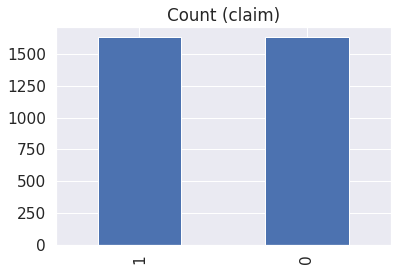

In [ ]:
# Class count
count_class_0, count_class_1 = df.claim.value_counts()

# Divide by class
df_class_0 = df[df['claim'] == 0]
df_class_1 = df[df['claim'] == 1]

# Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.claim.value_counts())

df_test_under.claim.value_counts().plot(kind='bar', title='Count (claim)')

splitting to labels and features

In [ ]:
df.columns

Index(['yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code', 'claim'],
      dtype='object')

In [ ]:
X = df_test_under.drop(['claim'],axis=1).values

y = df_test_under[['claim']].values

In [ ]:
#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

scaling data

In [ ]:
#feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

creating the model

In [ ]:
#loading the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

### Neural Net Base model

creating the model using 400 epochs and Adam optimizer


In [ ]:
# creating an instance
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))


# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam', metrics=['accuracy'])

fitting the model using 200 epochs

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
82/82 [==============================] - 1s 4ms/step - loss: 0.6879 - accuracy: 0.5707 - val_loss: 0.6850 - val_accuracy: 0.5544
Epoch 2/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5929 - val_loss: 0.6773 - val_accuracy: 0.5528
Epoch 3/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.5936 - val_loss: 0.6634 - val_accuracy: 0.6110
Epoch 4/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6185 - val_loss: 0.6666 - val_accuracy: 0.5881
Epoch 5/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6212 - val_loss: 0.6483 - val_accuracy: 0.6202
Epoch 6/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.6396 - val_loss: 0.6351 - val_accuracy: 0.6401
Epoch 7/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.6423 - val_loss: 0.6378 - val_accuracy: 0.6172
Epoch 8/200
8

plotting losses to show the performance of the model

In [ ]:
model_loss = pd.DataFrame(model.history.history)

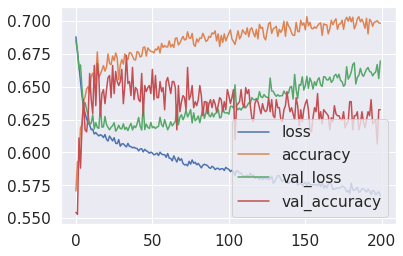

In [ ]:
model_loss.plot()

The validation loss starts increasing right after about 20 epochs

Early Stopping 
we then apply this method by monitoring the validation loss and setting the patience to 5 epochs

In [ ]:
# recreating the model to avoid working on our previous model
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))


# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam', metrics=['accuracy'])

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# defining the early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
# training our model
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
82/82 [==============================] - 1s 4ms/step - loss: 0.6882 - accuracy: 0.5462 - val_loss: 0.6860 - val_accuracy: 0.5436
Epoch 2/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5718 - val_loss: 0.6764 - val_accuracy: 0.5574
Epoch 3/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.5982 - val_loss: 0.6645 - val_accuracy: 0.5681
Epoch 4/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.6197 - val_loss: 0.6514 - val_accuracy: 0.6095
Epoch 5/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6247 - val_loss: 0.6465 - val_accuracy: 0.6217
Epoch 6/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.6415 - val_loss: 0.6285 - val_accuracy: 0.6401
Epoch 7/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6381 - val_loss: 0.6247 - val_accuracy: 0.6616
Epoch 8/200
8

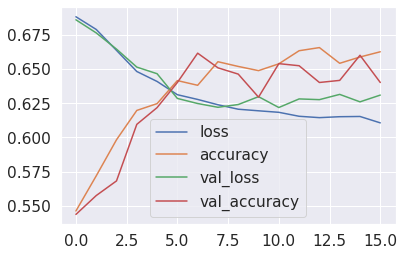

In [ ]:
# ploting losses
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
#model prediction
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[209 128]
 [107 209]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.66      0.62      0.64       337
           1       0.62      0.66      0.64       316

    accuracy                           0.64       653
   macro avg       0.64      0.64      0.64       653
weighted avg       0.64      0.64      0.64       653



* Using Adam we have achieved an accuracy of 64%

###Perharps using different optimizers 




1.  RmsProp



In [ ]:
# recreating the model
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))


# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'RmsProp', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
82/82 [==============================] - 1s 3ms/step - loss: 0.6913 - accuracy: 0.5282 - val_loss: 0.6880 - val_accuracy: 0.5253
Epoch 2/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5596 - val_loss: 0.6850 - val_accuracy: 0.5559
Epoch 3/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5661 - val_loss: 0.6751 - val_accuracy: 0.5544
Epoch 4/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.5917 - val_loss: 0.6697 - val_accuracy: 0.5850
Epoch 5/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6036 - val_loss: 0.6572 - val_accuracy: 0.6309
Epoch 6/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.6220 - val_loss: 0.6517 - val_accuracy: 0.6462
Epoch 7/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6339 - val_loss: 0.6403 - val_accuracy: 0.6386
Epoch 8/200
8

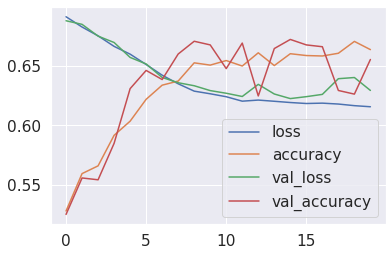

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

AdaGrad

In [ ]:
# creating an instance
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))


# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'AdaGrad', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
82/82 [==============================] - 1s 3ms/step - loss: 0.6978 - accuracy: 0.4960 - val_loss: 0.6951 - val_accuracy: 0.5161
Epoch 2/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4956 - val_loss: 0.6943 - val_accuracy: 0.5161
Epoch 3/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4960 - val_loss: 0.6938 - val_accuracy: 0.5176
Epoch 4/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4971 - val_loss: 0.6934 - val_accuracy: 0.5161
Epoch 5/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5069
Epoch 6/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4990 - val_loss: 0.6930 - val_accuracy: 0.5023
Epoch 7/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5036 - val_loss: 0.6928 - val_accuracy: 0.4931
Epoch 8/200
8

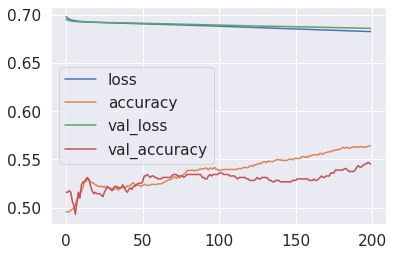

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Adam has proven to be the best optimizer for our model
at 20 epochs

In [ ]:
df.columns

Index(['yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code', 'claim'],
      dtype='object')

# Challenging the solution

##***Recreating the model using the best features from LDA and Adam***

In [ ]:
X = df_test_under[['building_fenced','garden']].values

y = df_test_under[['claim']].values
#splitting the train, test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#recreating the model using the best optimizer
model = Sequential()

model.add(Dense(units=12,activation='relu'))


model.add(Dense(units=12,activation='relu'))


model.add(Dense(units=12,activation='relu'))

model.add(Dense(units=12,activation='relu'))

# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
82/82 [==============================] - 1s 3ms/step - loss: 0.6916 - accuracy: 0.5213 - val_loss: 0.6923 - val_accuracy: 0.5161
Epoch 2/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5484 - val_loss: 0.6935 - val_accuracy: 0.5161
Epoch 3/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5484 - val_loss: 0.6944 - val_accuracy: 0.5161
Epoch 4/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5484 - val_loss: 0.6942 - val_accuracy: 0.5161
Epoch 5/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5484 - val_loss: 0.6956 - val_accuracy: 0.5161
Epoch 6/200
82/82 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5484 - val_loss: 0.6952 - val_accuracy: 0.5161
Epoch 00006: early stopping


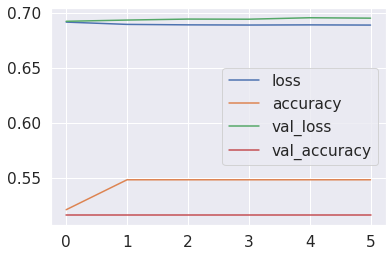

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Model Evaluation

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[170 167]
 [149 167]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.53      0.50      0.52       337
           1       0.50      0.53      0.51       316

    accuracy                           0.52       653
   macro avg       0.52      0.52      0.52       653
weighted avg       0.52      0.52      0.52       653



* We have achieved an accuracy of 52% using Adam and the best features according LDA.


##***Using Random Forest for feature selection***

In [ ]:
#defining the feature and label set
X = df_test_under.drop(['claim'],axis=1)
y = df_test_under['claim']
#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
df_test_under.columns

Index(['yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code', 'claim'],
      dtype='object')

In [ ]:
test_features = df_test_under.columns.to_list()
test_features.remove('claim')
# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()
#We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Nice to have: We can sort the values in descending order, since we care about the most important features
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('yearofobservation', 0.09), ('insured_period', 0.07), ('residential', 0.02), ('building_painted', 0.02), ('building_fenced', 0.0), ('garden', 0.0), ('settlement', 0.01), ('building dimension', 0.33), ('building_type', 0.05), ('date_of_occupancy', 0.12), ('numberofwindows', 0.06), ('geo_code', 0.22)]

Variable: building dimension   Importance: 0.33
Variable: geo_code             Importance: 0.22
Variable: date_of_occupancy    Importance: 0.12
Variable: yearofobservation    Importance: 0.09
Variable: insured_period       Importance: 0.07
Variable: numberofwindows      Importance: 0.06
Variable: building_type        Importance: 0.05
Variable: residential          Importance: 0.02
Variable: building_painted     Importance: 0.02
Variable: settlement           Importance: 0.01
Variable: building_fenced      Importance: 0.0
Variable: garden               Importance: 0.0


* Best features: Building dimension,geo_code, date of occupancy

In [ ]:
X = df_test_under[['building dimension','geo_code','date_of_occupancy']].values

y = df_test_under[['claim']].values
#splitting the train, test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#recreating the model using the best optimizer
model = Sequential()

model.add(Dense(units=12,activation='relu'))


model.add(Dense(units=12,activation='relu'))


model.add(Dense(units=12,activation='relu'))

model.add(Dense(units=12,activation='relu'))

# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam', metrics=['accuracy'])

In [ ]:
#fitting the model
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/200
82/82 [==============================] - 1s 3ms/step - loss: 217.9581 - accuracy: 0.4960 - val_loss: 53.9476 - val_accuracy: 0.5161
Epoch 2/200
82/82 [==============================] - 0s 2ms/step - loss: 25.2852 - accuracy: 0.5151 - val_loss: 3.1339 - val_accuracy: 0.5100
Epoch 3/200
82/82 [==============================] - 0s 2ms/step - loss: 1.5707 - accuracy: 0.5542 - val_loss: 0.8807 - val_accuracy: 0.5743
Epoch 4/200
82/82 [==============================] - 0s 2ms/step - loss: 0.8338 - accuracy: 0.5779 - val_loss: 0.8449 - val_accuracy: 0.6003
Epoch 5/200
82/82 [==============================] - 0s 2ms/step - loss: 0.7819 - accuracy: 0.5822 - val_loss: 0.8118 - val_accuracy: 0.6141
Epoch 6/200
82/82 [==============================] - 0s 2ms/step - loss: 0.7760 - accuracy: 0.5756 - val_loss: 0.8093 - val_accuracy: 0.5850
Epoch 7/200
82/82 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.5936 - val_loss: 0.7943 - val_accuracy: 0.5115
Epoch 8/2

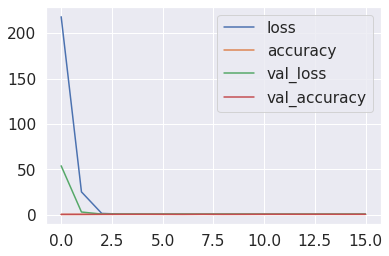

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
#model prediction
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[209 128]
 [137 179]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.60      0.62      0.61       337
           1       0.58      0.57      0.57       316

    accuracy                           0.59       653
   macro avg       0.59      0.59      0.59       653
weighted avg       0.59      0.59      0.59       653



# ***Conclusion***



* Random Forest Classifier as a method of feature selection performed better with an accuracy of 59% compared to LDA 52%.

* As of 2014 to 2016, the number of buildings that had claims  reduced significantly
* Non residential buildings had more claims as compared to residential buildings
* Not painted buildings had more claims compared to painted buildings
* Fenced had more claims compared to not fenced
* Buildings with gardens have more claims compared to without gardens
*  Rural settlements have more claims compared to urban settlements.
* Building type 2 has the most claims in comparison to other types.

# ***Recommendation***
*  The insurance company should optimize their marketing strategies to improve the business on buildings with the following characteristics:
** Not painted buildings 
** Fenced 
** Buildings with gardens
**  Rural settlements 
** Building Type 2
* Additional information should be provided by the insurance company like cost of the building,number of bedrooms and floors.
